In [52]:
from tensorflow.keras import datasets
import numpy as np
import matplotlib.pyplot as plt

In [53]:
(x_train,y_train),(x_test,y_test) = datasets.fashion_mnist.load_data()

In [54]:
classes = ["T-shirt/top","trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [55]:
print(f"x_train:{x_train.shape} y_train{y_train.shape}")
print(f"x_test:{x_test.shape} y_test{y_test.shape}")

x_train:(60000, 28, 28) y_train(60000,)
x_test:(10000, 28, 28) y_test(10000,)


Text(0.5, 1.0, 'Pullover')

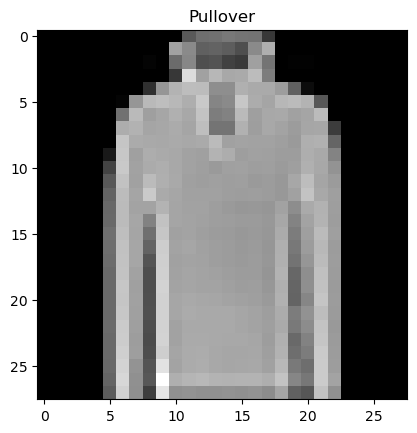

In [56]:
idx = np.random.choice(len(x_train))
plt.imshow(x_train[idx],cmap="gray")
plt.title(classes[y_train[idx]])

In [57]:
def process(imgs):
    imgs = imgs.astype("float32")/255
    imgs = np.pad(imgs,((0,0),(2,2),(2,2)),constant_values=0.0)
    imgs = np.expand_dims(imgs,-1)
    return imgs

In [58]:
x_train = process(x_train)
x_test = process(x_test)

Text(0.5, 1.0, 'T-shirt/top')

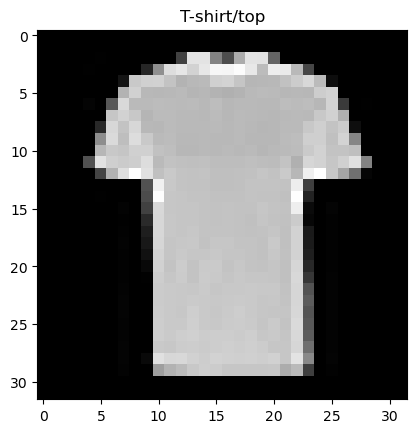

In [59]:
idx = np.random.choice(len(x_train))
plt.imshow(x_train[idx],cmap="gray")
plt.title(classes[y_train[idx]])

In [60]:
from tensorflow.keras import layers,models
import tensorflow.keras.backend as K

In [61]:
encoder_input = layers.Input(shape=(32,32,1),name="encoder_input")
x = layers.Conv2D(32,(3,3),strides=2,padding="same",activation="relu",)(encoder_input)
x = layers.Conv2D(64,(3,3),strides=2,padding="same",activation="relu",)(x)
x = layers.Conv2D(128,(3,3),strides=2,padding="same",activation="relu",)(x)
shape_before_flattening = K.int_shape(x)[1:]

x = layers.Flatten()(x)
encoder_output = layers.Dense(2,name="encoder_output")(x)

encoder = models.Model(encoder_input,encoder_output)

In [62]:
decoder_input = layers.Input(shape=(2,),name="decoder_input")
x = layers.Dense(np.prod(shape_before_flattening))(decoder_input)
x = layers.Reshape(shape_before_flattening)(x)
x = layers.Conv2DTranspose(128,kernel_size=(3,3),strides=2,padding="same",activation="relu")(x)
x = layers.Conv2DTranspose(64,kernel_size=(3,3),strides=2,padding="same",activation="relu")(x)
x = layers.Conv2DTranspose(32,kernel_size=(3,3),strides=2,padding="same",activation="relu")(x)
decoder_output = layers.Conv2D(1,(3,3),strides=1,activation="sigmoid",padding="same",name="decoder_output")(x)

decoder = models.Model(decoder_input,decoder_output)

In [63]:
autoencoder = models.Model(encoder_input,decoder(encoder_output))

In [64]:
autoencoder.compile(optimizer="adam",loss="binary_crossentropy")

In [65]:
autoencoder.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 encoder_output (Dense)      (None, 2)                 4098      
                                                                 
 model_6 (Functional)        (None, 32, 32, 1)         2462

In [66]:
hist = autoencoder.fit(x_train,x_train,epochs=5,batch_size=128,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/5
469/469 [==============================] - 35s 74ms/step - loss: 0.3033 - val_loss: 0.2622
Epoch 2/5
469/469 [==============================] - 35s 74ms/step - loss: 0.2581 - val_loss: 0.2574
Epoch 3/5
469/469 [==============================] - 35s 75ms/step - loss: 0.2543 - val_loss: 0.2542
Epoch 4/5
469/469 [==============================] - 35s 76ms/step - loss: 0.2525 - val_loss: 0.2534
Epoch 5/5
469/469 [==============================] - 36s 77ms/step - loss: 0.2511 - val_loss: 0.2521


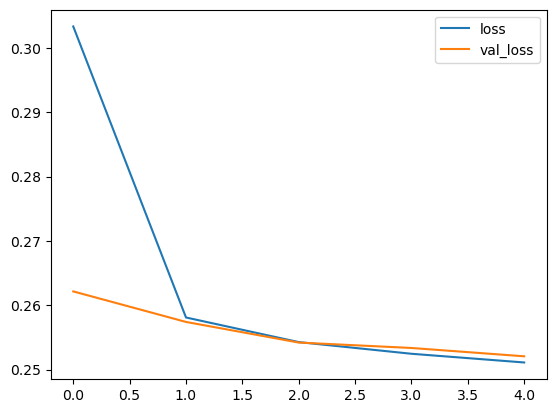

In [72]:
plt.plot(hist.history["loss"],label="loss")
plt.plot(hist.history["val_loss"],label="val_loss")
plt.legend()
plt.show()

In [77]:
encode_predictions = encoder.predict(x_test)
decode_prediction = decoder.predict(encode_predictions)

313/313 [==============================] - 2s 6ms/step


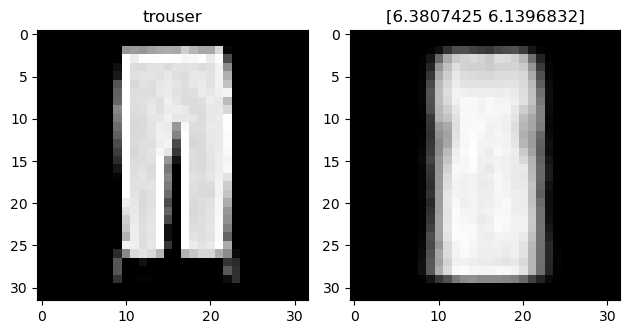

In [179]:
idx = np.random.choice(len(x_test))

fig,axs = plt.subplots(1,2)

axs[0].imshow(x_test[idx],cmap="gray")
axs[0].set_title(classes[y_test[idx]])

axs[1].imshow(decode_prediction[idx],cmap="gray")
axs[1].set_title(encode_predictions[idx])

plt.tight_layout()
plt.show()

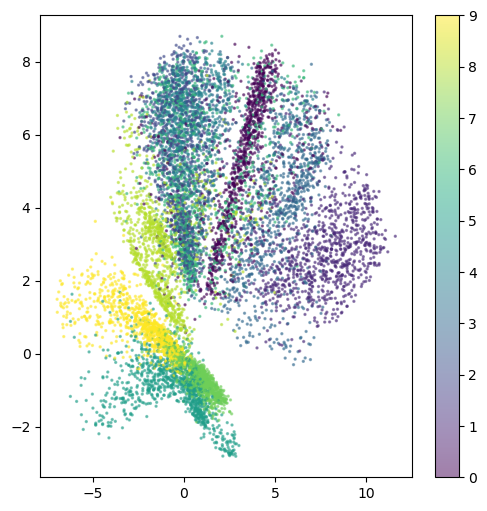

In [115]:

plt.figure(figsize=(6,6))
plt.scatter(encode_predictions[:,0],encode_predictions[:,1],c=y_test,alpha=0.5,s=2)
plt.colorbar()
plt.show()

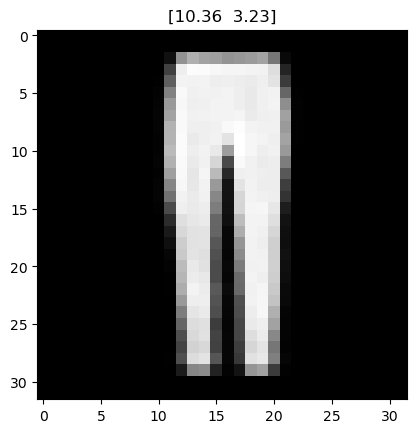

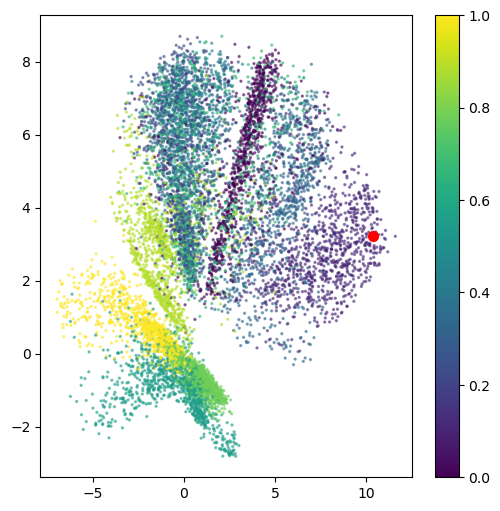

In [183]:
min,max = np.min(encode_predictions[:,0]),np.max(encode_predictions[:,0])

n_predictions = 1
points = np.random.uniform(min,max,size=(n_predictions,2,))
decode_img = decoder.predict(points,verbose=False)

if n_predictions == 1:
    fig, axs = plt.subplots(1, 1)
    plt.imshow(decode_img[0], cmap="gray")
    axs.set_title(np.round(points[0], decimals=2))
else:
    fig, axs = plt.subplots(1, n_predictions)
    for i in range(n_predictions):
        axs[i].imshow(decode_img[i], cmap="gray")
        axs[i].set_title(np.round(points[i], decimals=2))

plt.figure(figsize=(6,6))
plt.scatter(encode_predictions[:,0],encode_predictions[:,1],c=y_test,alpha=0.5,s=2)
plt.scatter(points[:,0],points[:,1],s=50,c="red")
plt.colorbar()
plt.show()

